# Derive the distance of M4 globular cluster using the period-luminosity relation from RR-Lyrae stars

I will use the well-known relation between the period and luminosity of 37 RR-Lyrae stars found in the M4 globular cluster to estimate its distance. I'm using the Neely et al. (2015) Spitzer Space Telescope observations from the http://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/ApJ/808/11 repository.

In [122]:
# Importing libraries
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

%matplotlib inline

In [123]:
# Reading input files downloaded from CDS
readme = 'data/ReadMe.txt'
rr_lyrae_data   = Table.read('data/table2.dat', readme=readme, format='cds')
# print(rr_lyrae_data.columns)

In [124]:
# Selecting the data
rr_lyrae = rr_lyrae_data[np.where(rr_lyrae_data['Mode'] == 'RRab')] # We will only need the RRab data
# the authors also mention that data for sources V20 and V21 are not good due to blending
rr_lyrae = rr_lyrae[np.where(rr_lyrae['ID'] != 'V20')]
rr_lyrae = rr_lyrae[np.where(rr_lyrae['ID'] != 'V21')]

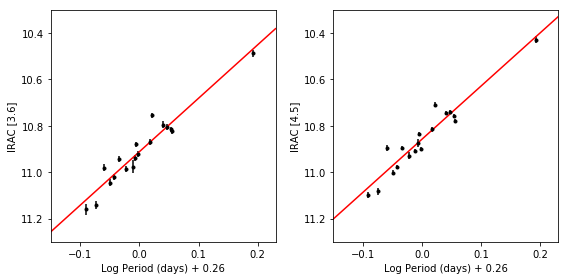

In [125]:
# Plotting and fitting the data-sets
fig, ax = plt.subplots(1,2,figsize=(8,4))

for i in np.arange(2):
    ax[i].set_xlim(-0.15,0.23)
    ax[i].set_ylim(11.3,10.3)
    ax[i].set_xticks([-0.1,0.0,0.1,0.2])

ax[0].set_xlabel('Log Period (days) + 0.26') # log(P) = -0.26 is a representative number of the mean period of the RRab 
ax[1].set_xlabel('Log Period (days) + 0.26')
ax[0].set_ylabel('IRAC [3.6]')
ax[1].set_ylabel('IRAC [4.5]')

# Scatter plots
ax[0].errorbar(rr_lyrae['logP']+0.26,rr_lyrae['[3.6]'],yerr=rr_lyrae['e_[3.6]'],fmt='o',marker='.',color='k')
ax[1].errorbar(rr_lyrae['logP']+0.26,rr_lyrae['[4.5]'],yerr=rr_lyrae['e_[4.5]'],fmt='o',marker='.',color='k')

# Line fitting
lin1 = np.polyfit(rr_lyrae['logP']+0.26,rr_lyrae['[3.6]'],1)
lin2 = np.polyfit(rr_lyrae['logP']+0.26,rr_lyrae['[4.5]'],1)

# Line plots
x = [-0.15,0.23]
y1 = np.array([lin1[0]])*x + np.array([lin1[1]])
y2 = np.array([lin2[0]])*x + np.array([lin2[1]])
ax[0].plot(x,y1,color='r')
ax[1].plot(x,y2,color='r')

plt.tight_layout()

The two relations are:

In [131]:
print('m_3.6 = ' + str(np.around(lin1[0], decimals=2)) + ' (log P + 0.26) + ' + str(np.around(lin1[1], decimals=2)))
print('m_4.5 = ' + str(np.around(lin2[0], decimals=2)) + ' (log P + 0.26) + ' + str(np.around(lin2[1], decimals=2)))

m_3.6 = -2.31 (log P + 0.26) + 10.91
m_4.5 = -2.3 (log P + 0.26) + 10.86


whereas the corresponding relations for the RR-Lyrae stars in our Galaxy are:
$$
M_{[3.6]} = -2.19\ {\rm log}\ P - 1.176
$$

$$
M_{[4.5]} = -2.12\ {\rm log}\ P - 1.199
$$

therefore the distance modulus (https://en.wikipedia.org/wiki/Distance_modulus) is given by:
$$
\mu_{[3.6]} = \left( m_{[3.6]} - M_{[3.6]} \right) =
$$

In [133]:
print(10.91+1.176)

12.086


and 
$$
\mu_{[4.5]} = \left( m_{[4.5]} - M_{[4.5]} \right) =
$$

In [134]:
print(10.86+1.199)

12.059
